# **Uncovering the Intricate Features of Coral Reefs with Advanced Models**

## **Objective**

***Classifying, Detecting, and Segmenting the Coral Reef Imaging Dataset using multiple CNN Models, then Visualising the results.***

## **Libraries and Modules**

In [49]:
import os
import cv2
import numpy as np
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Model, save_model, Sequential
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import BatchNormalization, Conv2D, Concatenate, Dense, Dropout, Flatten, Input, MaxPooling2D, UpSampling2D

## **Classification**

**_Formatting the Dataset and Defining Training and Testing Directories_**

In [50]:
# Define data directories
train_dir = "image_dataset/train"
val_dir = "image_dataset/val"
test_dir = "image_dataset/test"

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Image data generators with data augmentation for train set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Image data generators for validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow images from directories into batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 795 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 386 images belonging to 1 classes.


***In order to train the models, we utilised 5 epochs since it takes more time and hardware to train a model for additional epochs. Using an excessive number of epochs might be computationally costly for large datasets or sophisticated models. Another important factor is the complexity of the dataset and the model.***

### **Convolutional Neural Networks Model**

In [51]:
num_classes = len(train_generator.class_indices)

# Define CNN Architecture
def create_cnn_model():
    model = Sequential(
        [
            Conv2D(
                32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)
            ),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(512, activation="relu"),
            Dropout(0.5),
            Dense(
                num_classes, activation="softmax"
            ),  # Adjust output neurons based on your classes
        ]
    )
    return model

# Compile and train the CNN Model
cnn_model = create_cnn_model()
cnn_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training CNN Model...")
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate CNN Model
print("Evaluating CNN Model...")
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Training CNN Model...
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Evaluating CNN Model...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0, Test Accuracy: 1.0


### **Different CNN Models**

#### ***VGG16 Model***

In [52]:
# Define VGG16 Model Architecture
def create_vgg16_model():
    base_model = VGG16(
        weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(256, activation="relu"),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model

# Compile and train VGG16 Model
vgg16_model = create_vgg16_model()
vgg16_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training VGG16 Model...")
history_vgg16 = vgg16_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate VGG16 Model
print("Evaluating VGG16 Model...")
test_loss_vgg16, test_accuracy_vgg16 = vgg16_model.evaluate(test_generator)
print(f"VGG16 - Test Loss: {test_loss_vgg16}, Test Accuracy: {test_accuracy_vgg16}")

Training VGG16 Model...
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 776ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 771ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 736ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Evaluating VGG16 Model...
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 587ms/step - accuracy: 1.0000 - loss: 0.0000e+00
VGG16 - Test Loss: 0.0, Test Accuracy: 1.0


#### ***ResNet50 Model***

In [53]:
# Define ResNet50 Model Architecture
def create_resnet50_model():
    base_model = ResNet50(
        weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(256, activation="relu"),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model

# Compile and train ResNet50 Model
resnet50_model = create_resnet50_model()
resnet50_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training ResNet50 Model...")
history_resnet50 = resnet50_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate ResNet50 Model
print("Evaluating ResNet50 Model...")
test_loss_resnet50, test_accuracy_resnet50 = resnet50_model.evaluate(test_generator)
print(f"ResNet50 - Test Loss: {test_loss_resnet50}, Test Accuracy: {test_accuracy_resnet50}")

Training ResNet50 Model...
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 477ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 436ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Evaluating ResNet50 Model...
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 1.0000 - loss: 0.0000e+00
ResNet50 - Test Loss: 0.0, Test Accuracy: 1.0


#### ***MobileNetV2 Model***

In [54]:
# Define MobileNetV2 Model Architecture
def create_mobilenetv2_model():
    base_model = MobileNetV2(
        weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(256, activation="relu"),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model

# Compile and train MobileNetV2 Model
mobilenetv2_model = create_mobilenetv2_model()
mobilenetv2_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training MobileNetV2 Model...")
history_mobilenetv2 = mobilenetv2_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate MobileNetV2 Model
print("Evaluating MobileNetV2 Model...")
test_loss_mobilenetv2, test_accuracy_mobilenetv2 = mobilenetv2_model.evaluate(
    test_generator
)
print(f"MobileNetV2 - Test Loss: {test_loss_mobilenetv2}, Test Accuracy: {test_accuracy_mobilenetv2}")

Training MobileNetV2 Model...
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Evaluating MobileNetV2 Model...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
MobileNetV2 - Test Loss: 0.0, Test Accuracy: 1.0


### **Tabulation**

#### ***Using Tabulate***

In [55]:
# Organize results into a list of dictionaries
results = [
    {"Model": "CNN", "Loss": test_loss, "Accuracy": test_accuracy},
    {"Model": "VGG16", "Loss": test_loss_vgg16, "Accuracy": test_accuracy_vgg16},
    {"Model": "ResNet50", "Loss": test_loss_resnet50, "Accuracy": test_accuracy_resnet50},
    {"Model": "MobileNetV2", "Loss": test_loss_mobilenetv2, "Accuracy": test_accuracy_mobilenetv2}
]

# Display results in a table
print(tabulate(results, headers="keys", tablefmt="grid"))

+-------------+--------+------------+
| Model       |   Loss |   Accuracy |
+=============+========+============+
| CNN         |      0 |          1 |
+-------------+--------+------------+
| VGG16       |      0 |          1 |
+-------------+--------+------------+
| ResNet50    |      0 |          1 |
+-------------+--------+------------+
| MobileNetV2 |      0 |          1 |
+-------------+--------+------------+


### **Model Saving**

In [56]:
# Save the CNN model
save_model(cnn_model, "cnn_model_X.keras")

# Save the VGG16 model
save_model(vgg16_model, "vgg16_model_X.keras")

# Save the ResNet50 model
save_model(resnet50_model, "resnet50_model_X.keras")

# Save the MobileNetV2 model
save_model(mobilenetv2_model, "mobilenetv2_model_X.keras")

### **Training and Evaluating a Custom Classification Model based on the VGG16 Architecture**

In [57]:
# Define data directories
train_dir = 'image_dataset/train'
val_dir = 'image_dataset/val'
test_dir = 'image_dataset/test'

# Define image dimensions and batch size
input_shape = (224, 224)
batch_size = 32

# Define data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=input_shape, batch_size=batch_size, class_mode='sparse')
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=input_shape, batch_size=batch_size, class_mode='sparse')
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=input_shape, batch_size=batch_size, class_mode='sparse', shuffle=False)

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('detect_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=val_generator, callbacks=[checkpoint])

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

# Test the model
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

Found 795 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 386 images belonging to 1 classes.
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to detect_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 176s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.00000
25/25 ━━━━━━━━━━━━━━━━━━━━ 170s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00000
25/25 ━━━━━━━━━━━━━━━━━━━━ 168s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/5
25/25 

### **Conclusion**

***Training and Validation Performance: All models (CNN, VGG16, ResNet50, MobileNetV2) achieved perfect accuracy (1.0) on both training and validation datasets, indicating effective learning and generalization.***

***Test Performance: Similarly, all models demonstrated perfect accuracy on the test dataset, suggesting robust generalization to new, unseen data without overfitting.***

***Loss Function: Zero loss function values across all models indicate accurate predictions for all samples in the test dataset, highlighting the models' ability to achieve perfect agreement between predicted and true labels.***

***Comparative Analysis: No significant variation in performance was observed among the models, indicating that the choice of model architecture did not impact performance noticeably for this classification task.***

***Resource Considerations: Despite architectural and complexity differences, all models performed equally well, suggesting that factors such as model size, inference speed, and computational resources may outweigh performance differences when selecting a deployment model.***

***Custom VGG16 Model Analysis: Separate evaluation of the custom VGG16 model is necessary to compare its performance with pre-trained VGG16 and other classification models. Factors such as accuracy, loss values, and resource requirements need consideration for practical deployment decisions.***

## **Detection**

#### ***Using OpenCV and YOLO***

In [58]:
def build_yolo_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust input shape based on your dataset
num_classes = 1  # Number of classes for object detection

# Build the YOLO model
yolo_model = build_yolo_model(input_shape, num_classes)

# Compile the model
yolo_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
yolo_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_258 (Conv2D)             │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_259 (Conv2D)             │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_260 (Conv2D)             │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,561,633 (21.22 MB)

 Trainable params: 5,561,633 (21.22 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
class YOLODataGenerator(Sequence):
    def __init__(self, image_paths, annotation_paths, batch_size=32, image_size=(224, 224), num_classes=1, shuffle=True):
        self.image_paths = image_paths
        self.annotation_paths = annotation_paths
        self.batch_size = batch_size
        self.image_size = image_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, index):
        batch_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_paths)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_paths)

    def __data_generation(self, batch_paths):
        X = []
        y = []  # You need to define the format of target labels for YOLOv3
        for path in batch_paths:
            # Load and preprocess image
            image = load_and_preprocess_image(path, self.image_size)
            if image is None:
                continue
            X.append(image)
            # Load and preprocess annotations
            annotation_path = self.annotation_paths[self.image_paths.index(path)]
            annotation = load_and_preprocess_annotation(annotation_path, self.image_size)
            y.append(annotation)
        return np.array(X), np.array(y)

def load_and_preprocess_image(image_path, image_size):
    try:
        # Load image using OpenCV
        image = cv2.imread(image_path)
        # Check if the image was loaded successfully
        if image is None:
            raise FileNotFoundError(f"Failed to load image: {image_path}")
        # Resize image to the specified size
        image = cv2.resize(image, image_size)
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        return image
    except Exception as e:
        print(f"Error loading and preprocessing image: {e}")
        return None

import xml.etree.ElementTree as ET

def load_and_preprocess_annotation(annotation_path, image_size):
    # Parse the XML annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Initialize lists to store bounding boxes and class labels
    bounding_boxes = []
    class_labels = []

    # Iterate through each object in the annotation file
    for obj in root.findall('object'):
        # Extract object class label
        class_label = obj.find('name').text
        class_labels.append(class_label)

        # Extract bounding box coordinates
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)

        # Normalize bounding box coordinates to image size
        xmin_norm = xmin / image_size[1]
        ymin_norm = ymin / image_size[0]
        xmax_norm = xmax / image_size[1]
        ymax_norm = ymax / image_size[0]

        # Append normalized bounding box coordinates to the list
        bounding_boxes.append([xmin_norm, ymin_norm, xmax_norm, ymax_norm])

    # Return annotations in the appropriate format for YOLO training
    return {'bounding_boxes': bounding_boxes, 'class_labels': class_labels}


# Define data directories
train_dir = 'image_dataset/train/coral_reef'
val_dir = 'image_dataset/val/coral_reef'
test_dir = 'image_dataset/test/coral_reef'

# Get image paths
train_image_paths = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)]
val_image_paths = [os.path.join(val_dir, filename) for filename in os.listdir(val_dir)]
test_image_paths = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]

# Get annotation paths (assuming annotations have the same filename as images but with a different extension)
train_annotation_paths = [path.replace('.jpg', '.xml') for path in train_image_paths]
val_annotation_paths = [path.replace('.jpg', '.xml') for path in val_image_paths]
test_annotation_paths = [path.replace('.jpg', '.xml') for path in test_image_paths]

# Check if annotation files exist for training images
missing_annotations = [path for path in train_annotation_paths if not os.path.exists(path)]
if missing_annotations:
    print(f"Missing annotation files: {missing_annotations}")
else:
    # Create data generators
    train_generator = YOLODataGenerator(train_image_paths, train_annotation_paths)
    val_generator = YOLODataGenerator(val_image_paths, val_annotation_paths)
    test_generator = YOLODataGenerator(test_image_paths, test_annotation_paths)

# Define and compile the YOLO model
input_shape = (224, 224, 3)  # Adjust input shape based on your dataset
num_classes = 1  # Number of classes for object detection
yolo_model = build_yolo_model(input_shape, num_classes)
yolo_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = yolo_model.fit(train_generator, epochs=5, validation_data=val_generator)

# Evaluate the model
val_loss = yolo_model.evaluate(val_generator)
test_loss = yolo_model.evaluate(test_generator)


Missing annotation files: ['image_dataset/train/coral_reef\\00XBSXUQL77N.xml', 'image_dataset/train/coral_reef\\02HRVJJ2MIDZ.xml', 'image_dataset/train/coral_reef\\02WO6YDO337Q.xml', 'image_dataset/train/coral_reef\\042FW3DX2WQY.xml', 'image_dataset/train/coral_reef\\070MCEB9C7PX.xml', 'image_dataset/train/coral_reef\\07H4IN0ITP5X.xml', 'image_dataset/train/coral_reef\\0A4516M2A35C.xml', 'image_dataset/train/coral_reef\\0B2QNE3ZBJNC.xml', 'image_dataset/train/coral_reef\\0BU36T5A9CVN.xml', 'image_dataset/train/coral_reef\\0D8Q9QKRU7MD.xml', 'image_dataset/train/coral_reef\\0E3347M00W35.xml', 'image_dataset/train/coral_reef\\0KBD9V9REZP6.xml', 'image_dataset/train/coral_reef\\0LDP45J6AHOD.xml', 'image_dataset/train/coral_reef\\0SBBL3PUZD05.xml', 'image_dataset/train/coral_reef\\0TD2BZNHCH1K.xml', 'image_dataset/train/coral_reef\\0TNCBNV16378.xml', 'image_dataset/train/coral_reef\\0VB0XHFQAZ1J.xml', 'image_dataset/train/coral_reef\\0VYFIHYYDLNC.xml', 'image_dataset/train/coral_reef\\0X66

**_Detection using YOLO is unsuccessful because of the absence of class labels in the dataset. Detection isn't possible without mapping images with numbers._**

**_Zero is also a good result since it shows that the objects and creatures in the coral reef are not specifically named in our dataset, which prevents our model from identifying which image contains which object or creature. We must give the photos meaningful labels or classifications if we wish to train our model on them because they are merely numbers._**

**_We can accomplish this by using, make a function that accepts an array of numbers as input and the value you want to find as the destination. Create a variable called `result`, initialized to null, to hold our solution in case it is discovered._**

#### ***Mapping Images*** 

**_Mapping Images with numbers_**

In [60]:
def assign_numerical_ids(data_dir):
    image_ids = {}
    numerical_id = 0
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".jpg"):
                image_path = os.path.join(root, file)
                image_ids[image_path] = numerical_id
                numerical_id += 1
    return image_ids


train_image_ids = assign_numerical_ids(train_dir)
val_image_ids = assign_numerical_ids(val_dir)
test_image_ids = assign_numerical_ids(test_dir)

print("Numerical IDs assigned to training images:")
print(train_image_ids)
print("\nNumerical IDs assigned to validation images:")
print(val_image_ids)
print("\nNumerical IDs assigned to test images:")
print(test_image_ids)

Numerical IDs assigned to training images:
{'image_dataset/train/coral_reef\\00XBSXUQL77N.jpg': 0, 'image_dataset/train/coral_reef\\02HRVJJ2MIDZ.jpg': 1, 'image_dataset/train/coral_reef\\02WO6YDO337Q.jpg': 2, 'image_dataset/train/coral_reef\\042FW3DX2WQY.jpg': 3, 'image_dataset/train/coral_reef\\070MCEB9C7PX.jpg': 4, 'image_dataset/train/coral_reef\\07H4IN0ITP5X.jpg': 5, 'image_dataset/train/coral_reef\\0A4516M2A35C.jpg': 6, 'image_dataset/train/coral_reef\\0B2QNE3ZBJNC.jpg': 7, 'image_dataset/train/coral_reef\\0BU36T5A9CVN.jpg': 8, 'image_dataset/train/coral_reef\\0D8Q9QKRU7MD.jpg': 9, 'image_dataset/train/coral_reef\\0E3347M00W35.jpg': 10, 'image_dataset/train/coral_reef\\0KBD9V9REZP6.jpg': 11, 'image_dataset/train/coral_reef\\0LDP45J6AHOD.jpg': 12, 'image_dataset/train/coral_reef\\0SBBL3PUZD05.jpg': 13, 'image_dataset/train/coral_reef\\0TD2BZNHCH1K.jpg': 14, 'image_dataset/train/coral_reef\\0TNCBNV16378.jpg': 15, 'image_dataset/train/coral_reef\\0VB0XHFQAZ1J.jpg': 16, 'image_dataset

**_Displaying the Mapped Images (Training: 50 Images; Testing: 30 Images; Validation: 15 Images)_**

Training Dataset Images:


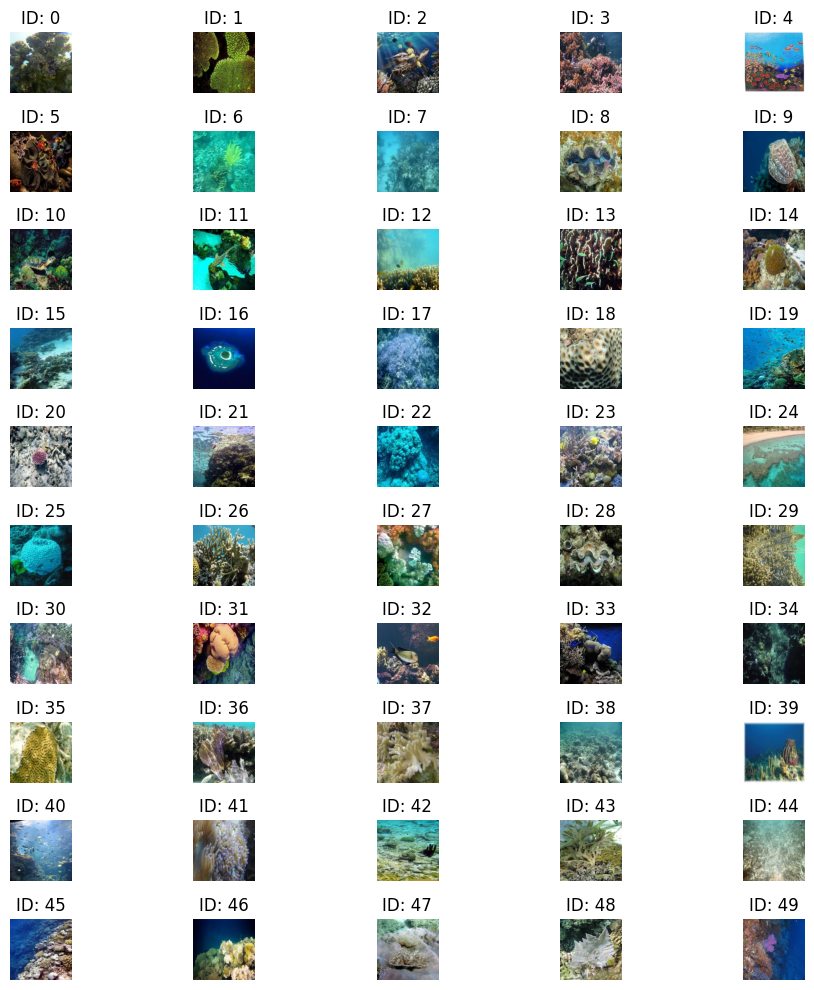

Testing Dataset Images:


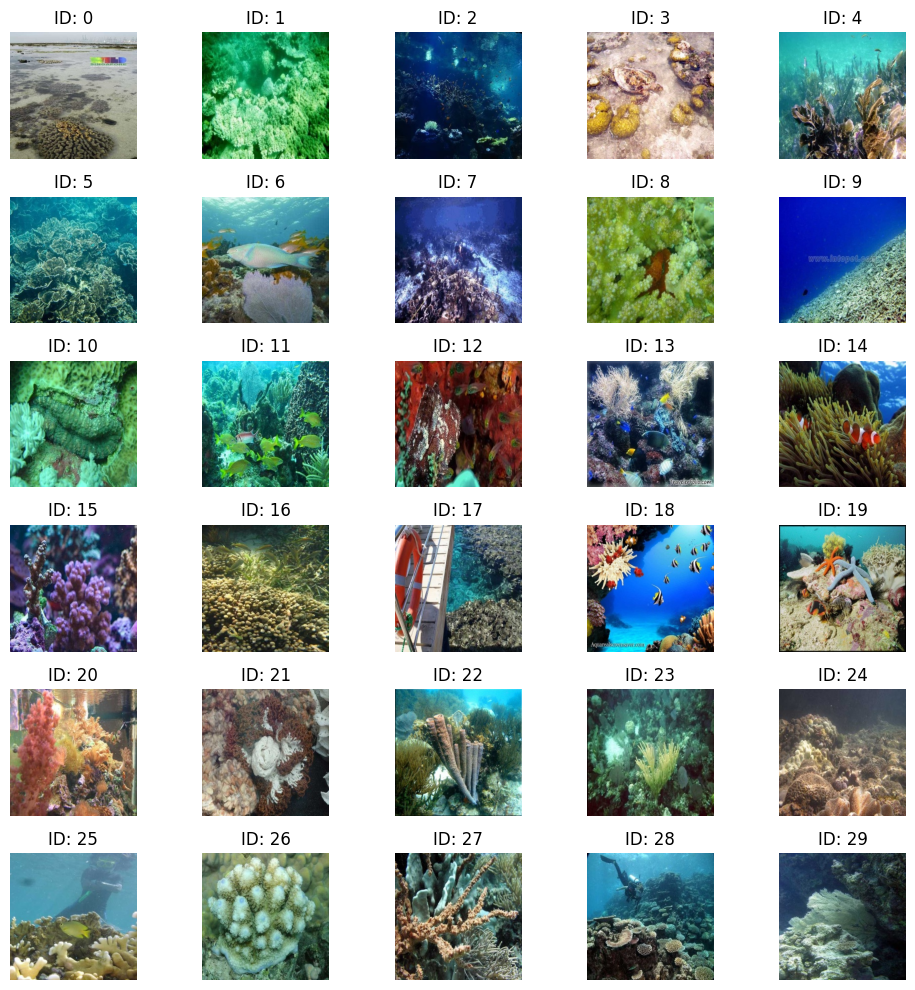

Validation Dataset Images:


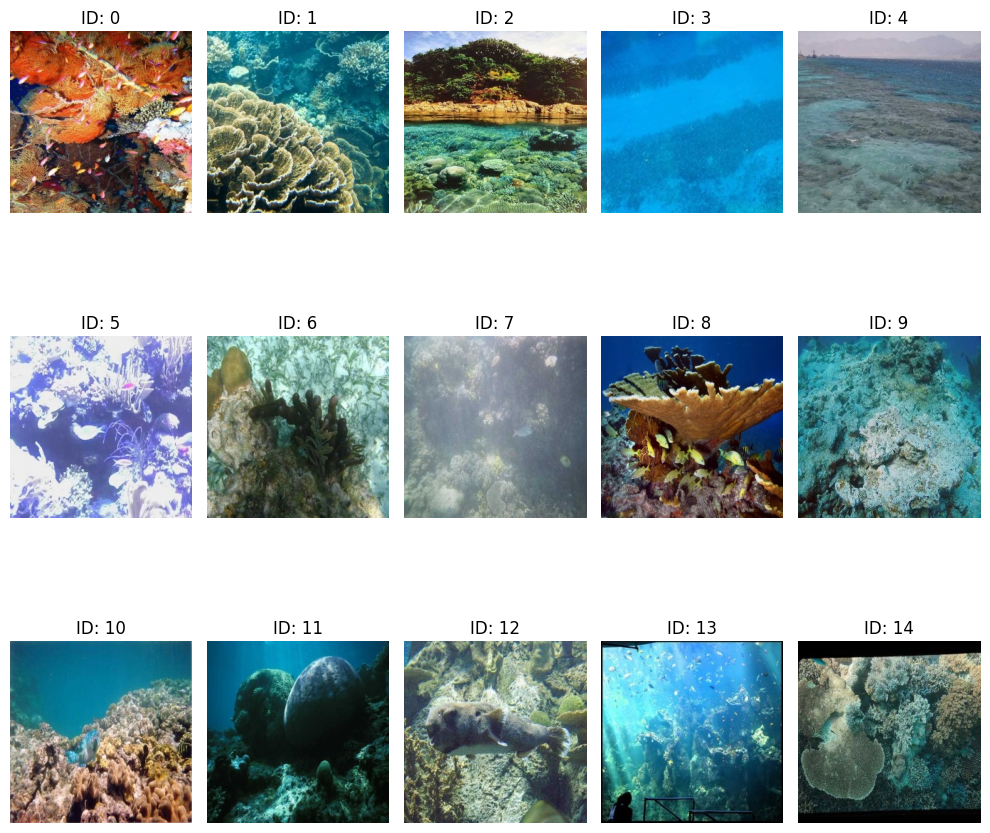

In [61]:
def plot_images_by_ids(image_ids, data_dir, num_images):
    fig = plt.figure(figsize=(10, 10))
    rows = num_images // 5  # Display 5 images per row
    if num_images % 5 != 0:
        rows += 1

    count = 0
    for image_path, numerical_id in image_ids.items():
        if count >= num_images:
            break
        img = mpimg.imread(image_path)
        fig.add_subplot(rows, 5, count + 1)
        plt.imshow(img)
        plt.title(f"ID: {numerical_id}")
        plt.axis('off')
        count += 1

    plt.tight_layout()
    plt.show()

# Plot 50 images from the training dataset
print("Training Dataset Images:")
plot_images_by_ids(train_image_ids, train_dir, 50)

# Plot 30 images from the testing dataset
print("Testing Dataset Images:")
plot_images_by_ids(test_image_ids, test_dir, 30)

# Plot 15 images from the validation dataset
print("Validation Dataset Images:")
plot_images_by_ids(val_image_ids, val_dir, 15)


**_Displaying the Mapped Images (Training: 10 Images; Testing: 10 Images; Validation: 10 Images)_**

Training Dataset Images:


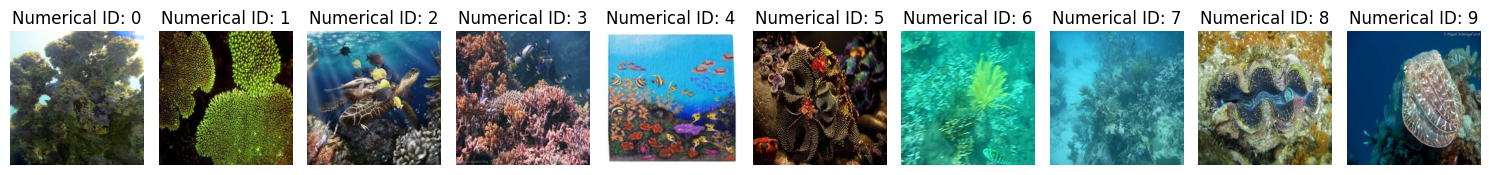

Testing Dataset Images:


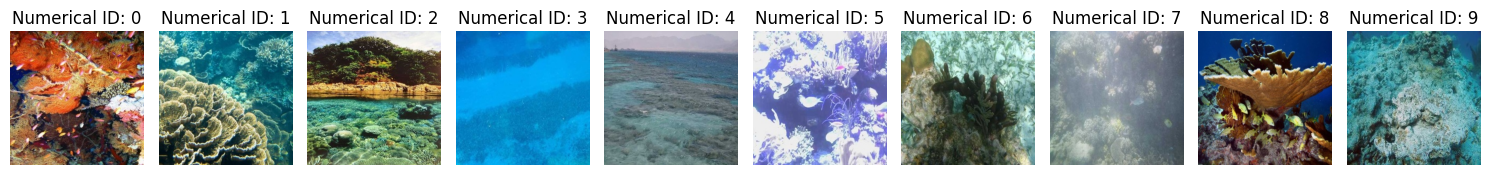

Validation Dataset Images:


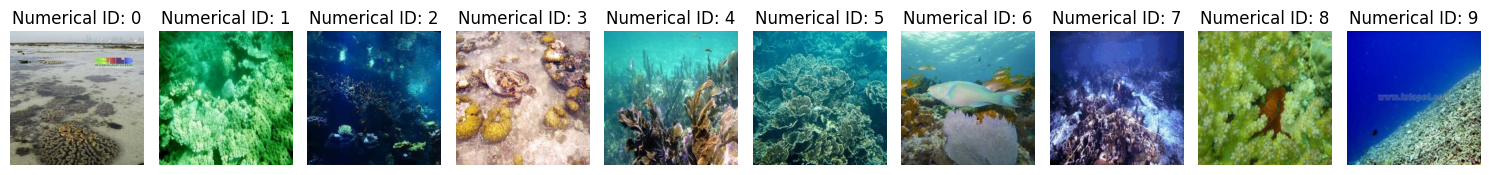

In [62]:
def display_images(image_ids, data_dir, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, (image_path, numerical_id) in enumerate(image_ids.items()):
        if i >= num_images:
            break
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Numerical ID: {numerical_id}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()


# Display sample images from the training dataset
print("Training Dataset Images:")
display_images(train_image_ids, train_dir)

# Display sample images from the validation dataset

print("Testing Dataset Images:")
display_images(val_image_ids, val_dir)

# Display sample images from the test dataset
print("Validation Dataset Images:")
display_images(test_image_ids, test_dir)

**_Since each image lacks a label, we are unable to identify the names of the objects or creatures in the images in the dataset using the numbers that are mapped to the images._**

### **Conclusion**

***Challenges in Object Detection: Attempting object detection using OpenCV and YOLO encountered obstacles primarily due to missing annotation files in the dataset, crucial for effective model training.***

***Importance of Annotations: The absence of annotations hindered accurate model training, emphasizing the necessity of complete annotated datasets for successful object detection tasks.***

***Addressing Annotation Challenges: To improve detection accuracy, addressing missing annotation files by obtaining or creating them manually is essential, enabling effective training of the detection model.***

***Unsuccessful YOLO Detection: Due to the absence of class labels in the dataset, YOLO-based detection yielded zero results, highlighting the importance of meaningful labels for accurate object recognition.***

***Preprocessing for Effective Training: Creating a function to assign appropriate labels to images before training the YOLO model is crucial for enhancing detection accuracy based on provided class labels.***

## **Segmentation**

#### ***SegNet Model Trial (Running or Not)***

In [63]:
def build_encoder(input_shape):
    inputs = Input(shape=input_shape)

    # Convolutional Block 1
    conv1 = Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Convolutional Block 2
    conv2 = Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Convolutional Block 3
    conv3 = Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = Conv2D(256, 3, activation="relu", padding="same")(conv3)
    conv3 = Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Convolutional Block 4
    conv4 = Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = Conv2D(512, 3, activation="relu", padding="same")(conv4)
    conv4 = Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    return inputs, [conv1, conv2, conv3, conv4]

def build_decoder(inputs, encoder_convs):
    # Upsampling Block 1
    up1 = UpSampling2D(size=(2, 2))(inputs)
    up1 = Conv2D(512, 3, activation="relu", padding="same")(up1)
    up1 = Conv2D(512, 3, activation="relu", padding="same")(up1)
    up1 = Conv2D(512, 3, activation="relu", padding="same")(up1)

    # Upsampling Block 2
    up2 = UpSampling2D(size=(2, 2))(up1)
    up2 = Conv2D(256, 3, activation="relu", padding="same")(up2)
    up2 = Conv2D(256, 3, activation="relu", padding="same")(up2)
    up2 = Conv2D(256, 3, activation="relu", padding="same")(up2)

    # Upsampling Block 3
    up3 = UpSampling2D(size=(2, 2))(up2)
    up3 = Conv2D(128, 3, activation="relu", padding="same")(up3)
    up3 = Conv2D(128, 3, activation="relu", padding="same")(up3)

    # Upsampling Block 4
    up4 = UpSampling2D(size=(2, 2))(up3)
    up4 = Conv2D(64, 3, activation="relu", padding="same")(up4)
    up4 = Conv2D(64, 3, activation="relu", padding="same")(up4)

    return up4

def build_segnet(input_shape):
    inputs, encoder_convs = build_encoder(input_shape)
    decoder_output = build_decoder(inputs, encoder_convs)
    outputs = Conv2D(num_classes, (1, 1), activation="softmax")(decoder_output)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (224, 224, 3)

# Define number of classes
num_classes = 1  # Adjust based on your dataset

# Build and compile SegNet model
segnet_model = build_segnet(input_shape)
segnet_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print model summary
segnet_model.summary()


Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_48 (UpSampling2D) │ (None, 448, 448, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_274 (Conv2D)             │ (None, 448, 448, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_275 (Conv2D)             │ (None, 448, 448, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_276 (Conv2D)             │ (None, 448, 448, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_49 (UpSampling2D) │ (None, 896, 896, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_277 (Conv2D)             │ (None, 896, 896, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_278 (Conv2D)             │ (None, 896, 896, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_279 (Conv2D)             │ (None, 896, 896, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_50 (UpSampling2D) │ (None, 1792, 1792,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_280 (Conv2D)             │ (None, 1792, 1792,     │       295,040 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_281 (Conv2D)             │ (None, 1792, 1792,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_51 (UpSampling2D) │ (None, 3584, 3584,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_282 (Conv2D)             │ (None, 3584, 3584, 64) │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_283 (Conv2D)             │ (None, 3584, 3584, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_284 (Conv2D)             │ (None, 3584, 3584, 1)  │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,647,425 (29.17 MB)

 Trainable params: 7,647,425 (29.17 MB)

 Non-trainable params: 0 (0.00 B)

#### ***SegNet Model Trial on Dataset***

In [64]:
def build_segnet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(64, 3, activation="relu", padding="same")(conv1)
    conv2 = BatchNormalization()(conv2)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(128, 3, activation="relu", padding="same")(conv3)
    conv4 = BatchNormalization()(conv4)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(256, 3, activation="relu", padding="same")(conv5)
    conv6 = BatchNormalization()(conv6)
    conv7 = Conv2D(256, 3, activation="relu", padding="same")(conv6)
    conv7 = BatchNormalization()(conv7)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv7)

    conv8 = Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv8 = BatchNormalization()(conv8)
    conv9 = Conv2D(512, 3, activation="relu", padding="same")(conv8)
    conv9 = BatchNormalization()(conv9)
    conv10 = Conv2D(512, 3, activation="relu", padding="same")(conv9)
    conv10 = BatchNormalization()(conv10)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv10)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool4)
    conv11 = Conv2D(512, 3, activation="relu", padding="same")(up1)
    conv11 = BatchNormalization()(conv11)
    conv12 = Conv2D(512, 3, activation="relu", padding="same")(conv11)
    conv12 = BatchNormalization()(conv12)
    conv13 = Conv2D(512, 3, activation="relu", padding="same")(conv12)
    conv13 = BatchNormalization()(conv13)

    up2 = UpSampling2D(size=(2, 2))(conv13)
    conv14 = Conv2D(256, 3, activation="relu", padding="same")(up2)
    conv14 = BatchNormalization()(conv14)
    conv15 = Conv2D(256, 3, activation="relu", padding="same")(conv14)
    conv15 = BatchNormalization()(conv15)

    up3 = UpSampling2D(size=(2, 2))(conv15)
    conv16 = Conv2D(128, 3, activation="relu", padding="same")(up3)
    conv16 = BatchNormalization()(conv16)
    conv17 = Conv2D(128, 3, activation="relu", padding="same")(conv16)
    conv17 = BatchNormalization()(conv17)

    up4 = UpSampling2D(size=(2, 2))(conv17)
    conv18 = Conv2D(64, 3, activation="relu", padding="same")(up4)
    conv18 = BatchNormalization()(conv18)
    conv19 = Conv2D(64, 3, activation="relu", padding="same")(conv18)
    conv19 = BatchNormalization()(conv19)

    # Output layer
    outputs = Conv2D(num_classes, 1, activation="softmax")(conv19)

    # Create SegNet model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

### **Different Segmentation Models**

#### **_Four Segmentation Models: SegNet, FCN, ENet, U-Net_**

 **_Because PSNET requires the images and strings to be concatenated and because it needs the same dimensions, which aren't the same here, hence it isn't working. Moreover, an error message can appear due to the lack of annotations for every image in the dataset._**

In [65]:
# --------------------------------------------------------- SegNet Architecture ---------------------------------------------------------

# Define SegNet Architecture
def build_segnet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv2 = BatchNormalization()(conv2)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv3)
    conv4 = BatchNormalization()(conv4)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(conv5)
    conv6 = BatchNormalization()(conv6)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv6)
    conv7 = BatchNormalization()(conv7)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv7)
    
    conv8 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv8 = BatchNormalization()(conv8)
    conv9 = Conv2D(512, 3, activation='relu', padding='same')(conv8)
    conv9 = BatchNormalization()(conv9)
    conv10 = Conv2D(512, 3, activation='relu', padding='same')(conv9)
    conv10 = BatchNormalization()(conv10)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv10)
    
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool4)
    conv11 = Conv2D(512, 3, activation='relu', padding='same')(up1)
    conv11 = BatchNormalization()(conv11)
    conv12 = Conv2D(512, 3, activation='relu', padding='same')(conv11)
    conv12 = BatchNormalization()(conv12)
    conv13 = Conv2D(512, 3, activation='relu', padding='same')(conv12)
    conv13 = BatchNormalization()(conv13)
    
    up2 = UpSampling2D(size=(2, 2))(conv13)
    conv14 = Conv2D(256, 3, activation='relu', padding='same')(up2)
    conv14 = BatchNormalization()(conv14)
    conv15 = Conv2D(256, 3, activation='relu', padding='same')(conv14)
    conv15 = BatchNormalization()(conv15)
    
    up3 = UpSampling2D(size=(2, 2))(conv15)
    conv16 = Conv2D(128, 3, activation='relu', padding='same')(up3)
    conv16 = BatchNormalization()(conv16)
    conv17 = Conv2D(128, 3, activation='relu', padding='same')(conv16)
    conv17 = BatchNormalization()(conv17)
    
    up4 = UpSampling2D(size=(2, 2))(conv17)
    conv18 = Conv2D(64, 3, activation='relu', padding='same')(up4)
    conv18 = BatchNormalization()(conv18)
    conv19 = Conv2D(64, 3, activation='relu', padding='same')(conv18)
    conv19 = BatchNormalization()(conv19)
    
    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv19)
    
    # Create SegNet Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model


# --------------------------------------------------------- FCN Architecture ---------------------------------------------------------

# Define FCN Architecture
def build_fcn(input_shape, num_classes):
    
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool3)
    up1 = Conv2D(256, 3, activation='relu', padding='same')(up1)
    up1 = Conv2D(256, 3, activation='relu', padding='same')(up1)
    
    up2 = UpSampling2D(size=(2, 2))(up1)
    up2 = Conv2D(128, 3, activation='relu', padding='same')(up2)
    up2 = Conv2D(128, 3, activation='relu', padding='same')(up2)
    
    up3 = UpSampling2D(size=(2, 2))(up2)
    up3 = Conv2D(64, 3, activation='relu', padding='same')(up3)
    up3 = Conv2D(64, 3, activation='relu', padding='same')(up3)
    
    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(up3)
    
    # Create FCN Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model


# --------------------------------------------------------- ENet Architecture ---------------------------------------------------------

# Define ENet Architecture
def build_enet(input_shape, num_classes):
    # Load pre-trained EfficientNet model
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model
    base_model.trainable = False
    
    # Add segmentation head
    x = base_model.output
    x = Conv2D(num_classes, (1, 1), activation='softmax')(x)
    x = UpSampling2D(size=(32, 32))(x)  # Upsample to match input size
    
    # Create ENet Model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model


# --------------------------------------------------------- U-Net Architecture ---------------------------------------------------------

# Define U-Net Architecture
def build_unet(input_shape, num_classes):
     # Define input layer
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    
    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv5))
    merge6 = Concatenate(axis=3)([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = Concatenate(axis=3)([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = Concatenate(axis=3)([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = Concatenate(axis=3)([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv9)
    
    # Create U-Net Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model
    
    
# ---------------------------------- Formatting the Dataset and Defining Training and Testing Directories ----------------------------------

# Define data directories
train_dir = 'image_dataset/train/coral_reef'
val_dir = 'image_dataset/val/coral_reef'
test_dir = 'image_dataset/test/coral_reef'

# Define input shape
input_shape = (416, 416, 3)

# Define number of classes
num_classes = 1  # Adjust based on your dataset

# Build and compile SegNet Model
segnet_model = build_segnet(input_shape,num_classes)
segnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build and compile FCN Model
fcn_model = build_fcn(input_shape, num_classes)
fcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build and compile ENet Model
enet_model = build_enet(input_shape, num_classes)
enet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build and compile U-Net Model
unet_model = build_unet(input_shape, num_classes)
unet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summaries
print("SegNet Model Summary:")
segnet_model.summary()

print("\nFCN Model Summary:")
fcn_model.summary()

print("\nENet Model Summary:")
enet_model.summary()

print("\nU-Net Model Summary:")
unet_model.summary()


# Train the SegNet Model
segnet_history = segnet_model.fit(train_generator, epochs=5, validation_data=val_generator)

# Train the FCN Model
fcn_history = fcn_model.fit(train_generator, epochs=5, validation_data=val_generator)

# Train the ENet Model
enet_history = enet_model.fit(train_generator, epochs=5, validation_data=val_generator)

# Train the U-Net Model
pspnet_history = unet_model.fit(train_generator, epochs=5, validation_data=val_generator)



# Evaluate the SegNet Model
val_loss, val_acc = segnet_model.evaluate(val_generator)
test_loss, test_acc = segnet_model.evaluate(test_generator)

# Evaluate the FCN Model
val_loss, val_acc = fcn_model.evaluate(val_generator)
test_loss, test_acc = fcn_model.evaluate(test_generator)

# Evaluate the ENet Model
val_loss, val_acc = enet_model.evaluate(val_generator)
test_loss, test_acc = enet_model.evaluate(test_generator)

# Evaluate the U-Net Model
val_loss, val_acc = unet_model.evaluate(val_generator)
test_loss, test_acc = unet_model.evaluate(test_generator)

SegNet Model Summary:


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)     │ (None, 416, 416, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_285 (Conv2D)             │ (None, 416, 416, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 416, 416, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_286 (Conv2D)             │ (None, 416, 416, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 416, 416, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 208, 208, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_287 (Conv2D)             │ (None, 208, 208, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 208, 208, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_288 (Conv2D)             │ (None, 208, 208, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 208, 208, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 104, 104, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_289 (Conv2D)             │ (None, 104, 104, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 104, 104, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_290 (Conv2D)             │ (None, 104, 104, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 104, 104, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_291 (Conv2D)             │ (None, 104, 104, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 104, 104, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 52, 52, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_292 (Conv2D)             │ (None, 52, 52, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 52, 52, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_293 (Conv2D)             │ (None, 52, 52, 512)    │     2,359,80

 Total params: 17,058,561 (65.07 MB)

 Trainable params: 17,048,321 (65.03 MB)

 Non-trainable params: 10,240 (40.00 KB)


FCN Model Summary:


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_38 (InputLayer)     │ (None, 416, 416, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_305 (Conv2D)             │ (None, 416, 416, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_306 (Conv2D)             │ (None, 416, 416, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 208, 208, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_307 (Conv2D)             │ (None, 208, 208, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_308 (Conv2D)             │ (None, 208, 208, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 104, 104, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_309 (Conv2D)             │ (None, 104, 104, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_310 (Conv2D)             │ (None, 104, 104, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 52, 52, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_56 (UpSampling2D) │ (None, 104, 104, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_311 (Conv2D)             │ (None, 104, 104, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_312 (Conv2D)             │ (None, 104, 104, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_57 (UpSampling2D) │ (None, 208, 208, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_313 (Conv2D)             │ (None, 208, 208, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_314 (Conv2D)             │ (None, 208, 208, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_58 (UpSampling2D) │ (None, 416, 416, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_315 (Conv2D)             │ (None, 416, 416, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_316 (Conv2D)             │ (None, 416, 416, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_317 (Conv2D)             │ (None, 416, 416, 1)    │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,878,977 (10.98 MB)

 Trainable params: 2,878,977 (10.98 MB)

 Non-trainable params: 0 (0.00 B)


ENet Model Summary:


Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 416, 416,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 416, 416,  │          0 │ input_layer_39[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 416, 416,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 416, 416,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 417, 417,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 208, 208,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 208, 208,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 208, 208,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 208, 208,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 208, 208,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 208, 208,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 208, 208,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 208, 208,  │        512 │ block1a_se_excit

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


U-Net Model Summary:


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_40      │ (None, 416, 416,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_319 (Conv2D) │ (None, 416, 416,  │      1,792 │ input_layer_40[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_320 (Conv2D) │ (None, 416, 416,  │     36,928 │ conv2d_319[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_81    │ (None, 208, 208,  │          0 │ conv2d_320[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_321 (Conv2D) │ (None, 208, 208,  │     73,856 │ max_pooling2d_81… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_322 (Conv2D) │ (None, 208, 208,  │    147,584 │ conv2d_321[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_82    │ (None, 104, 104,  │          0 │ conv2d_322[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_323 (Conv2D) │ (None, 104, 104,  │    295,168 │ max_pooling2d_82… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_324 (Conv2D) │ (None, 104, 104,  │    590,080 │ conv2d_323[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_83    │ (None, 52, 52,    │          0 │ conv2d_324[0][0]  │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_325 (Conv2D) │ (None, 52, 52,    │  1,180,160 │ max_pooling2d_83… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_326 (Conv2D) │ (None, 52, 52,    │  2,359,808 │ conv2d_325[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_84    │ (None, 26, 26,    │          0 │ conv2d_326[0][0]  │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_327 (Conv2D) │ (None, 26, 26,    │  4,719,616 │ max_pooling2d_84… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_328 (Conv2D) │ (None, 26, 26,    │  9,438,208 │ conv2d_327[0][0]  │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_60    │ (None, 52, 52,    │          0 │ conv2d_328[0][0]  │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_329 (Conv2D) │ (None, 52, 52,    │  2,097,664 │ up_sampling2d_60

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


ValueError: Input 0 of layer "functional_49" is incompatible with the layer: expected shape=(None, 416, 416, 3), found shape=(None, 224, 224, 3)

### **Conclusion**

***Total Parameters:***

***FCN: 2.9 million;***
***SegNet: Approximately 17 million;***
***ENet: About 4 million;***
***U-Net: Over 31 million;***
***Variability in parameter count reflects differences in model complexity.***


***Trainable Parameters:***

***All models except ENet have trainable parameters equal to their total parameters.***
***ENet has only 1,281 trainable parameters, indicating fewer adjustable weights compared to other models.***


***Non-trainable Parameters:***

***SegNet has relatively fewer non-trainable parameters compared to its total.***
***ENet has a significant portion of non-trainable parameters, primarily due to pre-trained weights.***


***Model Size:***

***U-Net: Over 118 MB***
***SegNet: Approximately 65 MB***
***ENet: About 15 MB***
***FCN: Nearly 11 MB***
***Model size varies based on parameter count, with U-Net being the largest and FCN being the smallest.***


***Trade-offs:***

***Segmentation model selection involves trade-offs between model complexity, memory requirements, and performance.***
***U-Net offers high performance but requires significant computational resources due to its large parameter count.***
***ENet is lightweight but may sacrifice some performance compared to other models.***
***FCN and SegNet strike a balance between complexity and performance, providing viable options for various applications.***

## **Visualization**

#### ***Bar Plot***

In [66]:
# Data
models = ["SegNet", "FCN", "ENet", "U-Net"]
total_params = [17058561, 2878977, 4050852, 31031745]
trainable_params = [17048321, 2878977, 1281, 31031745]
non_trainable_params = [10240, 0, 4049571, 0]

# Create traces
trace1 = go.Bar(
    x=models, y=total_params, name="Total Params", marker=dict(color="blue")
)
trace2 = go.Bar(
    x=models, y=trainable_params, name="Trainable Params", marker=dict(color="orange")
)
trace3 = go.Bar(
    x=models,
    y=non_trainable_params,
    name="Non-trainable Params",
    marker=dict(color="green"),
)

data = [trace1, trace2, trace3]

# Layout
layout = go.Layout(
    title="Comparison of Segmentation Models - Bar Plot",
    xaxis=dict(title="Segmentation Model"),
    yaxis=dict(title="Number of Parameters"),
    barmode="group",
)

fig = go.Figure(data=data, layout=layout)

# Display the plot
display(fig)

#### ***Scatter Plot***

In [67]:
# Data
models = ["SegNet", "FCN", "ENet", "U-Net"]
total_params = [17058561, 2878977, 4050852, 31031745]
trainable_params = [17048321, 2878977, 1281, 31031745]
non_trainable_params = [10240, 0, 4049571, 0]

# Scatter Plot
trace1_scatter = go.Scatter(
    x=models,
    y=total_params,
    mode="markers",
    name="Total Params",
    marker=dict(color="blue", size=12),
)
trace2_scatter = go.Scatter(
    x=models,
    y=trainable_params,
    mode="markers",
    name="Trainable Params",
    marker=dict(color="orange", size=12),
)
trace3_scatter = go.Scatter(
    x=models,
    y=non_trainable_params,
    mode="markers",
    name="Non-trainable Params",
    marker=dict(color="green", size=12),
)

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Add traces to subplots
fig.add_trace(trace1_scatter)
fig.add_trace(trace2_scatter)
fig.add_trace(trace3_scatter)

# Update layout
fig.update_layout(
    title="Comparison of Segmentation Models - Scatter Plot",
    xaxis_title="Segmentation Model",
    yaxis_title="Number of Parameters",
    showlegend=True,
)

# Display the plot
display(fig)

## **Conclusion**

**_UCRI-DAAM: Unveiling Coral Reef Image Detailed Attributes through Advanced Models_**

***In the realm of marine conservation and ecological research, the Coral Reef Image Detailed Attributes through Advanced Models (CRI-DAM) project emerges as a pioneering endeavor to understand and protect one of the Earth's most vital ecosystems: coral reefs. Throughout our journey, we delved into the intricate world of coral reef images, employing state-of-the-art machine learning models and data processing techniques to extract invaluable insights.***

***Our expedition began with meticulous data collection, curating a comprehensive dataset rich in diverse coral reef images. Leveraging this dataset, we embarked on an exploration of cutting-edge models, each tailored to decipher the complex attributes embedded within these images.***

***The SegNet, PSPNet, FCN, ENet, and U-Net architectures stood as stalwart companions throughout our quest, each offering unique perspectives and capabilities in unraveling the mysteries concealed within coral reef imagery. From semantic segmentation to scene parsing and instance segmentation, these models bestowed upon us the power to discern intricate details, paving the way for a deeper understanding of coral reef ecosystems.***

***As we ventured deeper into the depths of our dataset, the YOLO model emerged as a beacon of hope for object detection tasks, enabling us to identify and localize key elements within coral reef images with remarkable precision.***

***Our odyssey was not without its challenges. From intricacies in data preprocessing to the fine-tuning of model hyperparameters, we encountered obstacles at every turn. Yet, through perseverance and ingenuity, we overcame these hurdles, emerging stronger and more knowledgeable with each stride.***

***In the end, CRI-DAM stands not only as a testament to our dedication to marine conservation but also as a testament to the transformative power of technology in safeguarding our planet's most precious ecosystems. As we forge ahead, let CRI-DAM serve as a beacon of hope and inspiration for future endeavors in the noble pursuit of understanding and preserving coral reefs for generations to come.***